## Himmelblau sampling example

The Himmelblau function is a classical test function for optimization. It is not necessarily hard to appraise, but it gives us a good reference point when investigating priors.

In [1]:
import hmc_tomography

Here we create the Himmelblau target. It is always 2 dimensional, so we don't have to pass that along. Additionally, we create an 'unbounded uniform' distribution, which is zero everywhere on the real line. It is not necessarily *no information*, as it already gives preference to specific orders of magnitude. Lastly, we'll create a unit mass matrix, by lack of a better idea.

In [2]:
target = hmc_tomography.Targets.Himmelblau(annealing=50)
prior = hmc_tomography.Priors.Uniform(target.dimensions)
mass_matrix = hmc_tomography.MassMatrices.Unit(target.dimensions)

Assemble all of it in a sampler object

In [3]:
sampler = hmc_tomography.Samplers.HMC(target, mass_matrix, prior)

Start sampling.

<div class="alert alert-info">

**Note:** 

Note that I explicitly overwrite the previously generated samples. Sometimes when re-running a code lots of times, it might get tedious to go through the user-interaction for defining new filenames. Use this function at your own risk!

</div>

In [4]:
sampler.sample("samples_himmelblau.h5", 
               overwrite_samples=True, 
               proposals=50000, 
               online_thinning=10, 
               time_step=0.75, 
               sample_ram_buffer_size=137);

sys:1: Warning: 
Silently overwriting existing samples file (samples_himmelblau.h5) if it exists.
Tot. acc rate: 0.77. Last 100 acc rate: 0.79. Progress: 100%|██████████| 50000/50000 [00:17<00:00, 2787.43it/s]


And visualize the samples:

<div class="alert alert-info">

**Note:** 

Using the sampler.samples_filename allows us to use an updated filename. If you don't use the `overwite_samples` variable when sampling, you might be prompted for a new filename if the samples file already exists. This chosen filename is stored in `HMC.samples_filename`, for later use, such as loading samples.

</div>

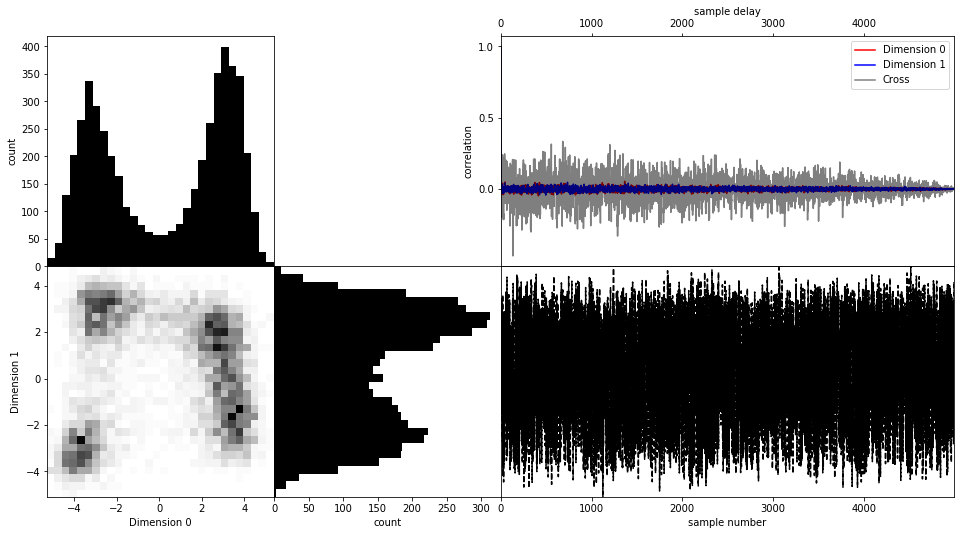

In [5]:
with hmc_tomography.Post.Samples(sampler.samples_filename) as samples:
    hmc_tomography.Post.Visualization.visualize_2_dimensions(samples, bins=30, show=True)